# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
pd.set_option("display.max_colwidth", 200)
%matplotlib inline

In [2]:
%matplotlib notebook

# Reading Cleaned Data

In [3]:
#reading the csv file
df=pd.read_csv('cleaned_news.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Unnamed: 0      200 non-null int64
title           200 non-null object
content         200 non-null object
tidy_content    200 non-null object
dtypes: int64(1), object(3)
memory usage: 6.3+ KB


In [5]:
df.head()

,Unnamed: 0,title,content,tidy_content
0,0,"Alton Sterling’s son: ’Everyone needs to protest the right way, with peace’","The son of a Louisiana man whose father was shot and killed at range by Baton Rouge police asked protesters for “peace” and “no violence, none whatsoever”. Cameron Sterling, the son of Alton ...",louisiana whose father shot kill rang baton roug polic ask protest peac violenc none whatsoev cameron sterl alton sterl whose death hand polic caught video spoke father protest alton sterl kill ba...
1,1,Shakespeare’s first four folios sell at auction for almost £2.5m,"Copies of William Shakespeare’s first four books, dubbed the “Holy Grail of publishing” have sold for almost £2. 5m at auction. Christie’s said they were sold as separate lots on Wednesday but wer...",copi william shakespear first four book dub holi grail publish sold almost auction christi said sold separ lot wednesday bought anonym privat american collector sale london includ bard first folio...
2,2,My grandmother’s death saved me from a life of debt,"Debt: $20, 000, Source: College, credit cards, Estimated time till debt free: Unclear, From a purely financial standpoint, my grandmother’s death is probably the best thing that has happened to me...",debt sourc colleg credit card estim time till debt free unclear from pure financi standpoint grandmoth death probabl best thing happen adult life grandmoth came oversea live mother high school rav...
3,3,I feared my life lacked meaning. Cancer pushed me to find some,"It was late. I was drunk, nearing my 35th birthday this past May, alone in a dank college dorm room, attending my grad school reunion. The journal entry I wrote that night was just one line: “I’...",late drunk near birthday past alon dank colleg dorm room attend grad school reunion journal entri wrote night line want reunion charad noth life actual suggest track ambiti public servic aspir wor...
4,4,"Texas man serving life sentence innocent of double murder, judge says","A central Texas man serving a life sentence for a double murder in 1992 is innocent, as are three codefendants no longer in prison, a state judge has found. Retired district judge George Allen rul...",central texa serv life sentenc doubl murder innoc three codefend longer prison state judg found retir district judg georg allen rule friday richard bryan kussmaul free three codefend receiv senten...


In [6]:
#tokenizing the cleaned content
df['tokenized_content'] = df['tidy_content'].apply(lambda x: x.split())

In [7]:
#checking first news tokenised value.
print((df['tokenized_content'].values)[0])

['louisiana', 'whose', 'father', 'shot', 'kill', 'rang', 'baton', 'roug', 'polic', 'ask', 'protest', 'peac', 'violenc', 'none', 'whatsoev', 'cameron', 'sterl', 'alton', 'sterl', 'whose', 'death', 'hand', 'polic', 'caught', 'video', 'spoke', 'father', 'protest', 'alton', 'sterl', 'kill', 'baton', 'roug', 'polic', 'juli', 'conveni', 'store', 'said', 'sell', 'baton', 'roug', 'polic', 'said', 'statement', 'polic', 'call', 'conveni', 'store', 'sterl', 'allegedli', 'threaten', 'anoth', 'patron', 'press', 'confer', 'wednesday', 'cameron', 'first', 'sinc', 'broke', 'sob', 'nation', 'broadcast', 'press', 'confer', 'mother', 'follow', 'father', 'death', 'came', 'talk', 'everyon', 'death', 'father', 'feel', 'peopl', 'gener', 'said', 'cameron', 'whose', 'distinctli', 'young', 'voic', 'calm', 'compos', 'front', 'scrum', 'report', 'tripl', 'conveni', 'store', 'peopl', 'gener', 'matter', 'race', 'come', 'togeth', 'unit', 'famili', 'argument', 'violenc', 'crime', 'said', 'cameron', 'protest', 'want', 

# visualizations


<IPython.core.display.Javascript object>


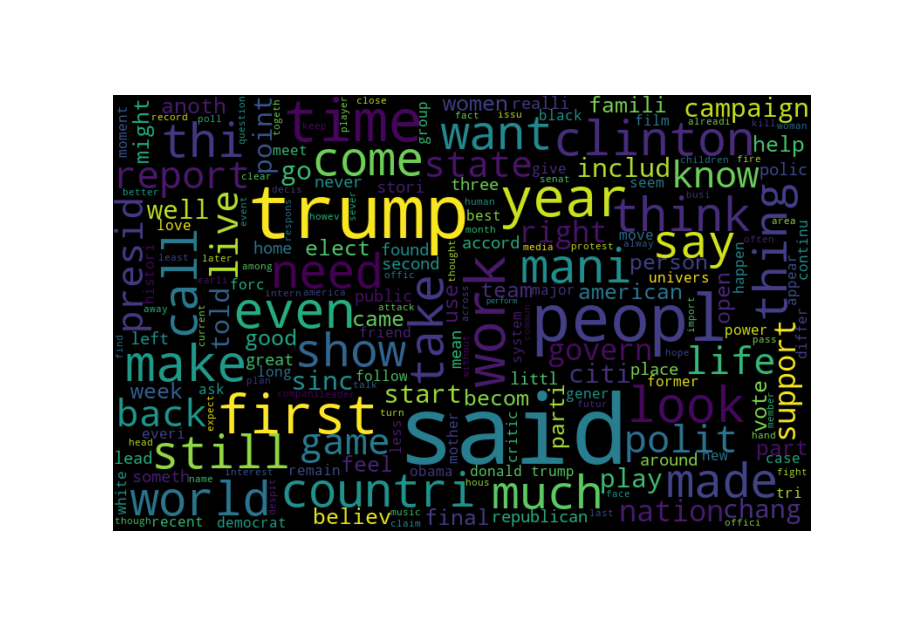

In [8]:
#showing up a word cloud. The bigger the font the more is the occurance
all_words = ' '.join([text for text in df['tidy_content']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
#making list of all the words.
all_words=df.tokenized_content
all_words=sum(all_words,[])

<IPython.core.display.Javascript object>


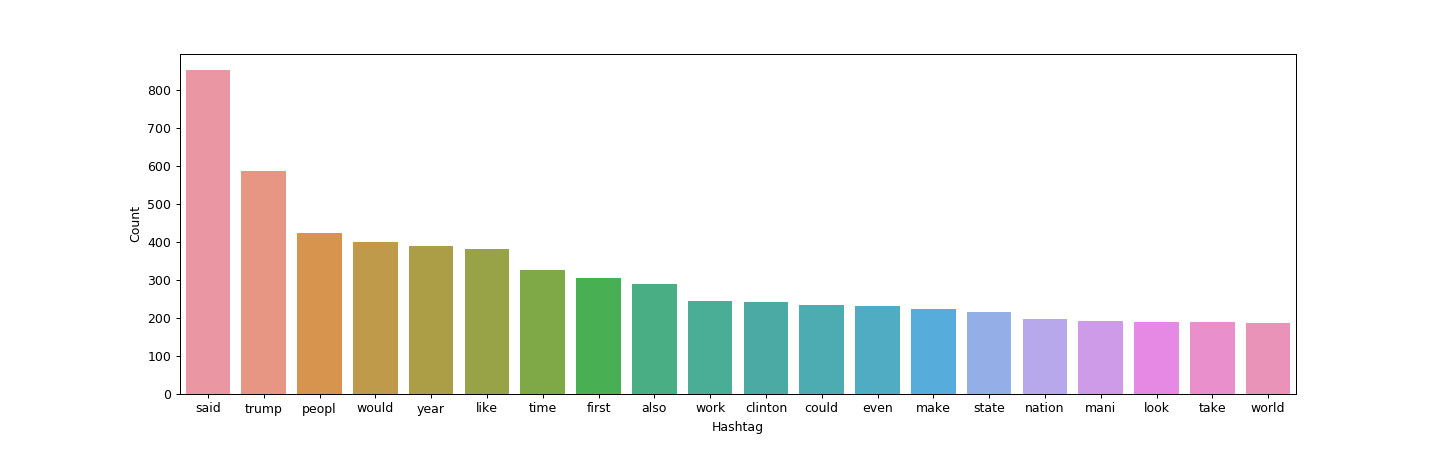

In [10]:
#plotting the frequency distribution of all the words.
a = nltk.FreqDist(all_words)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent words     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [11]:
'''count vectorizer just count the frequency of each word in a document for all the words in the corpus 
   whereas TF-IDF vectoriser count the TF-IDF score of each word for all the words in the corpus'''
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

#bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,max_features=100, stop_words='english')
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df['tidy_content'])
bow.shape

C:\Users\Akarsh Somani\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


(200, 5272)

In [12]:
#top twenty words of the corpus
bow_vectorizer.get_feature_names()[:20]

['aaron',
 'abandon',
 'abbrevi',
 'abil',
 'abl',
 'ablaz',
 'aboard',
 'abolish',
 'abort',
 'abound',
 'abov',
 'abraham',
 'abroad',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'abstract',
 'absurd',
 'abund']

In [13]:
#creating doc-term matrix for our documents
term_doc_mat=bow_vectorizer.transform(df['tidy_content'].values)

#Saving the term doc matrix to csv file
a=term_doc_mat.todense()
my_df = pd.DataFrame(a)
my_df.columns=bow_vectorizer.get_feature_names()
my_df.index=['Doc'+str(i) for i in range(1,201)]
my_df.to_csv('term_doc_count_score.csv')

# TF-IDF
Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

    TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

    IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

    IDF(t) = log_e(Total number of documents / Number of documents with term t in it).


In [14]:
'''Here we calculate the TF-IDF score for all the documents'''
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

#bow_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,max_features=100, stop_words='english')
bow_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df['tidy_content'])
bow.shape

(200, 5272)

In [15]:
#last 20 words from the corpus
bow_vectorizer.get_feature_names()[-20:]

['yard',
 'yeah',
 'year',
 'yell',
 'yesterday',
 'york',
 'yorker',
 'young',
 'younger',
 'youngest',
 'youngster',
 'youth',
 'youtub',
 'zeal',
 'zealand',
 'zero',
 'zigzag',
 'zika',
 'zlatan',
 'zone']

In [16]:
#creating doc-term matrix for our documents
term_doc_mat=bow_vectorizer.transform(df['tidy_content'].values)

#Saving the term doc matrix to csv file
a=term_doc_mat.todense()
my_df = pd.DataFrame(a)
my_df.columns=bow_vectorizer.get_feature_names()
my_df.index=['Doc'+str(i) for i in range(1,201)]
my_df.to_csv('term_doc_tfidf_score.csv')

In [17]:
'''finding document similarity using cosine similarity technique
   and preparing the Doc-Doc matrix for comparing the similarity 
   of each document with one other.'''
cos_similarity_matrix = (a * a.T)
print(cos_similarity_matrix.shape)

(200, 200)


In [18]:
#sving our doc-doc matrix to csv file to check our validity. 
doc_doc = pd.DataFrame(cos_similarity_matrix)
doc_doc.columns=['Doc'+str(i) for i in range(1,201)]
doc_doc.index=['Doc'+str(i) for i in range(1,201)]
doc_doc.to_csv('doc_doc.csv')